In [ ]:
!pip install google_play_scraper

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

In [ ]:
import json
import csv
from google_play_scraper import Sort, reviews_all
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

In [ ]:
app_id = 'fi.twomenandadog.walkmaster'
reviews = reviews_all(
    app_id,
    sleep_milliseconds=0,  # Defaults to 0
    lang='en',  # Defaults to 'en'
    sort=Sort.MOST_RELEVANT,  # Defaults to Sort.MOST_RELEVANT
)

# Write reviews to a file
with open('reviews.txt', 'w') as outfile:
    for review in reviews:
        review_data = {
            "review_id": review['reviewId'],
            "user_id": review['userName'],
            "rating": review['score'],
            "likes" : review['thumbsUpCount'],
            "text": review['content']
        }
        outfile.write(json.dumps(review_data) + '\n')


In [ ]:
#converting json to dataframe
df = pd.read_json('reviews.txt', lines=True)

In [ ]:
df.to_csv('data.csv', index=False)

In [ ]:
df.head()

,review_id,user_id,rating,likes,text
0,6194b6ad-838b-4b82-bdab-de02a2a35a5b,dave foley,5,135,This game is super fun. There are ads but they...
1,d387556a-ef8d-40cd-8319-8adb92445bd8,Nate Ja,3,75,"I'd really like to give it 5 Stars, but... Too..."
2,147fefc8-3d14-47af-87f5-44948ec69fd7,Eric Parsons,1,110,"The game is fun but as others have stated, the..."
3,392167a1-16a8-434c-845d-610fe072caf7,Lia Gamer,5,139,"Its a great game, great time passer. Although ..."
4,8bc0ceec-be1f-4fd5-9cff-ae061306f88d,Jester,3,197,"It's a really fun game! However, after a certa..."


In [ ]:
print(df.shape)

(15101, 5)


<Axes: title={'center': 'Count of reviews by stars'}>

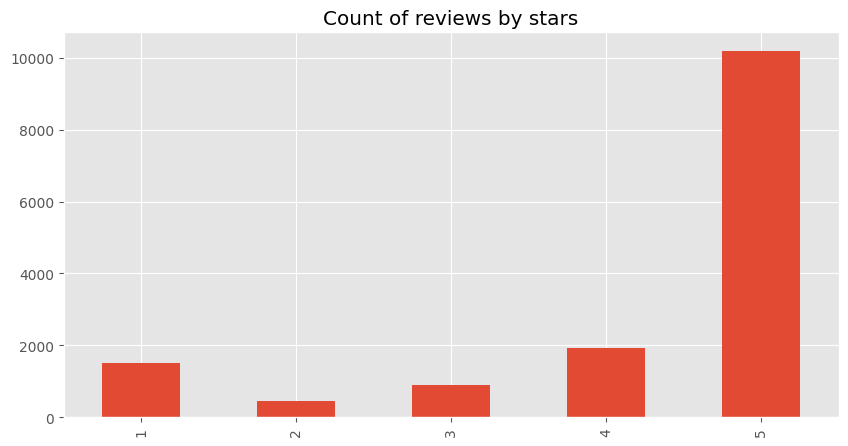

In [ ]:
df['rating'].value_counts().sort_index().plot(kind='bar', title = 'Count of reviews by stars', figsize = (10,5))

Finding fake reviews using anonymous user id and the length of the review provided

In [ ]:
filtered_df = df[df['user_id'] == 'A Google user']
filtered_df['word_count'] = filtered_df['text'].apply(lambda x: len(x.split()))
final_df = filtered_df[filtered_df['word_count'] <=5 ]

<ipython-input-116-074cc32f6251>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['word_count'] = filtered_df['text'].apply(lambda x: len(x.split()))


In [ ]:
final_df.shape

(3136, 6)

In [ ]:
import pandas as pd

# assuming your DataFrame is called `df`
final_df.to_csv("final_df.csv", index=False)

In [ ]:
import re
import pandas as pd

# assuming the original dataset is stored in a Pandas DataFrame called `df`
filtered_rows = []
for _, row in filtered_df.iterrows():
    if not re.search("[\u2600-\u27ff\ufe0f]+", row['text']):
        filtered_rows.append(row)

# create a new DataFrame with the filtered rows
filtered_df = pd.DataFrame(filtered_rows, columns=df.columns)


Sentiment analysis using vader

In [ ]:
!pip install nltk
import nltk
nltk.download('vader_lexicon')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()


In [ ]:
df['text'][0]

"This game is super fun. There are ads but they aren't nearly as frequent as some of the angrier reviewers would have you believe. Also, you can click past them after a few seconds. A great game should get some income and that's what the ads are for. Much fun and plenty of smiles watching my character flail around trying to navigate the well designed levels. Kudos to the designers. It's a legit surge of endorphins when my little dude gets tossed in the air at the end of a level."

In [ ]:
sia.polarity_scores(df['text'][0])

{'neg': 0.041, 'neu': 0.722, 'pos': 0.237, 'compound': 0.9702}

In [ ]:
#run polarity scores on entire dataset
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
  text = row['text']
  myid = row['user_id']
  res[i]=sia.polarity_scores(text)

  0%|          | 0/14991 [00:00<?, ?it/s]

In [ ]:
res

{0: {'neg': 0.041, 'neu': 0.722, 'pos': 0.237, 'compound': 0.9702},
 1: {'neg': 0.166, 'neu': 0.722, 'pos': 0.112, 'compound': -0.7198},
 2: {'neg': 0.112, 'neu': 0.737, 'pos': 0.151, 'compound': 0.5095},
 3: {'neg': 0.085, 'neu': 0.758, 'pos': 0.157, 'compound': 0.8646},
 4: {'neg': 0.23, 'neu': 0.591, 'pos': 0.178, 'compound': -0.76},
 5: {'neg': 0.077, 'neu': 0.706, 'pos': 0.217, 'compound': 0.9484},
 6: {'neg': 0.107, 'neu': 0.738, 'pos': 0.155, 'compound': 0.4354},
 7: {'neg': 0.022, 'neu': 0.77, 'pos': 0.208, 'compound': 0.9536},
 8: {'neg': 0.059, 'neu': 0.646, 'pos': 0.295, 'compound': 0.9791},
 9: {'neg': 0.058, 'neu': 0.736, 'pos': 0.206, 'compound': 0.9208},
 10: {'neg': 0.109, 'neu': 0.622, 'pos': 0.27, 'compound': 0.93},
 11: {'neg': 0.08, 'neu': 0.731, 'pos': 0.19, 'compound': 0.8701},
 12: {'neg': 0.0, 'neu': 0.638, 'pos': 0.362, 'compound': 0.9755},
 13: {'neg': 0.177, 'neu': 0.574, 'pos': 0.249, 'compound': 0.8442},
 14: {'neg': 0.046, 'neu': 0.758, 'pos': 0.196, 'comp

In [ ]:
vaders = pd.DataFrame(res).T

In [ ]:
vaders

,neg,neu,pos,compound
0,0.041,0.722,0.237,0.9702
1,0.166,0.722,0.112,-0.7198
2,0.112,0.737,0.151,0.5095
3,0.085,0.758,0.157,0.8646
4,0.230,0.591,0.178,-0.7600
...,...,...,...,...
14986,0.000,1.000,0.000,0.0000
14987,0.000,1.000,0.000,0.0000
14988,0.000,1.000,0.000,0.0000
14989,0.000,1.000,0.000,0.0000


In [ ]:
vaders.head(10)

,neg,neu,pos,compound
0,0.041,0.722,0.237,0.9702
1,0.166,0.722,0.112,-0.7198
2,0.112,0.737,0.151,0.5095
3,0.085,0.758,0.157,0.8646
4,0.230,0.591,0.178,-0.7600
5,0.077,0.706,0.217,0.9484
6,0.107,0.738,0.155,0.4354
7,0.022,0.770,0.208,0.9536
8,0.059,0.646,0.295,0.9791
9,0.058,0.736,0.206,0.9208


In [ ]:
vaders = df.merge(vaders,left_index=True, right_index=True)

In [ ]:
vaders.head(10)

,review_id,user_id,rating,likes,text,neg,neu,pos,compound
0,6194b6ad-838b-4b82-bdab-de02a2a35a5b,dave foley,5,105,This game is super fun. There are ads but they...,0.041,0.722,0.237,0.9702
1,147fefc8-3d14-47af-87f5-44948ec69fd7,Eric Parsons,1,101,"The game is fun but as others have stated, the...",0.166,0.722,0.112,-0.7198
2,d387556a-ef8d-40cd-8319-8adb92445bd8,Nate Ja,3,46,"I'd really like to give it 5 Stars, but... Too...",0.112,0.737,0.151,0.5095
3,392167a1-16a8-434c-845d-610fe072caf7,Lia Gamer,5,139,"Its a great game, great time passer. Although ...",0.085,0.758,0.157,0.8646
4,8bc0ceec-be1f-4fd5-9cff-ae061306f88d,Jester,3,195,"It's a really fun game! However, after a certa...",0.230,0.591,0.178,-0.7600
5,0d06e6ef-40a1-4519-bb1a-f300adb66c78,Cameron Brock,5,113,"This is a great game, no more of a fabulous ga...",0.077,0.706,0.217,0.9484
6,2a862ff5-1d6e-4ab3-85a2-0f421b785665,A Google user,5,4,I absolutely love this game. I spend a lot of ...,0.107,0.738,0.155,0.4354
7,b33d66d5-129a-4f1f-befd-e01ac111b28f,A Google user,5,144,"Worth the price, I was skeptical at first. Tho...",0.022,0.770,0.208,0.9536
8,67ceaf71-45e9-4f58-8bbd-6bfc775ec0c4,Kief Gringo,4,28,"Great game, but there's one thing I would like...",0.059,0.646,0.295,0.9791
9,3f4aab5e-f240-4b58-a2d7-1dda8b10f7e2,Benjermen Cat,4,65,Honestly this game is very good. It's simple y...,0.058,0.736,0.206,0.9208


In [ ]:
import pandas as pd

# assuming your DataFrame is called `df`
vaders.to_csv("vaders.csv", index=False)

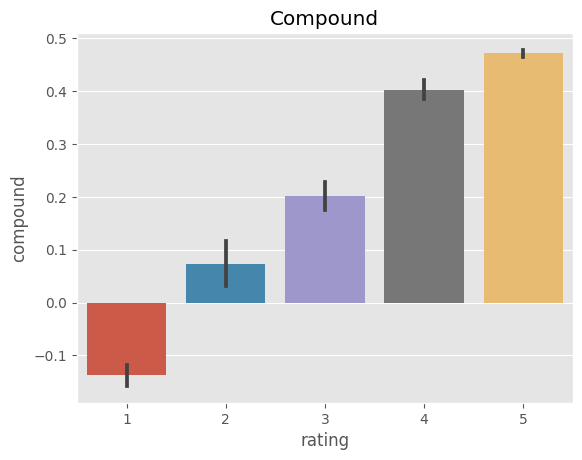

In [ ]:
ax = sns.barplot(data = vaders, x='rating',y='compound')
ax.set_title('Compound')
plt.show()

In [ ]:
# run polarity scores on entire dataset
import math
vaders = h
prob = {}
for i, row in tqdm(vaders.iterrows(), total=len(vaders)):
  p = 0.0
  neu = row['neu']
  neg = row['neg']
  pos = row['pos']
  total = row['compound']
  rating = row['rating']
  word_count = len(row['text'].split())
  likes = row['likes']

  if(word_count<=5):
    p+=(6-word_count)*0.01
  elif(word_count>100):
    p+=0.03

  if(rating==5):
    p+=0.1
  elif(rating==1):
    p+=0.025

  p+=((1-(abs(total)))/10)**2

  if(likes<20):
    p+=0.012

  prob[i]=p


  0%|          | 0/14991 [00:00<?, ?it/s]

In [ ]:
prob = probability(vaders)

In [ ]:
prob

{0: 0.1000088804,
 1: 0.0257851204,
 2: 0.0024059025000000003,
 3: 0.10018333160000001,
 4: 0.000576,
 5: 0.1000266256,
 6: 0.1151877316,
 7: 0.1000215296,
 8: 4.3681000000000124e-06,
 9: 6.272640000000008e-05,
 10: 0.100049,
 11: 0.00016874010000000005,
 12: 0.10000600250000001,
 13: 0.1002427364,
 14: 0.1120425104,
 15: 0.1120003136,
 16: 0.0034680321,
 17: 0.10000179560000001,
 18: 0.0120053824,
 19: 0.1000454276,
 20: 0.1120182329,
 21: 0.0001223236000000001,
 22: 0.0121643524,
 23: 0.0422823824,
 24: 0.00020880249999999988,
 25: 0.1002408704,
 26: 4.1731599999999985e-05,
 27: 0.1121929321,
 28: 0.042001822499999994,
 29: 0.0001359556000000001,
 30: 0.1000692224,
 31: 0.0250543169,
 32: 5.328999999999994e-05,
 33: 0.0371036324,
 34: 5.616900000000025e-06,
 35: 0.10010120360000001,
 36: 0.013302488099999999,
 37: 0.1000008649,
 38: 0.0386281225,
 39: 0.0006806881000000001,
 40: 0.1000910116,
 41: 0.1000045796,
 42: 0.0300352836,
 43: 0.0013286025000000003,
 44: 0.10019572010000001,


In [ ]:
probability = pd.DataFrame.from_dict(prob, orient='index',columns=['prob'])

In [ ]:
probability.head(15)

,prob
0,0.100009
1,0.025785
2,0.002406
3,0.100183
4,0.000576
5,0.100027
6,0.115188
7,0.100022
8,0.000004
9,0.000063


In [ ]:
probability = vaders.merge(probability,left_index=True, right_index=True)

In [ ]:
probability.head(15)

,review_id,user_id,rating,likes,text,neg,neu,pos,compound,prob
0,6194b6ad-838b-4b82-bdab-de02a2a35a5b,dave foley,5,105,This game is super fun. There are ads but they...,0.041,0.722,0.237,0.9702,0.100009
1,147fefc8-3d14-47af-87f5-44948ec69fd7,Eric Parsons,1,101,"The game is fun but as others have stated, the...",0.166,0.722,0.112,-0.7198,0.025785
2,d387556a-ef8d-40cd-8319-8adb92445bd8,Nate Ja,3,46,"I'd really like to give it 5 Stars, but... Too...",0.112,0.737,0.151,0.5095,0.002406
3,392167a1-16a8-434c-845d-610fe072caf7,Lia Gamer,5,139,"Its a great game, great time passer. Although ...",0.085,0.758,0.157,0.8646,0.100183
4,8bc0ceec-be1f-4fd5-9cff-ae061306f88d,Jester,3,195,"It's a really fun game! However, after a certa...",0.230,0.591,0.178,-0.7600,0.000576
5,0d06e6ef-40a1-4519-bb1a-f300adb66c78,Cameron Brock,5,113,"This is a great game, no more of a fabulous ga...",0.077,0.706,0.217,0.9484,0.100027
6,2a862ff5-1d6e-4ab3-85a2-0f421b785665,A Google user,5,4,I absolutely love this game. I spend a lot of ...,0.107,0.738,0.155,0.4354,0.115188
7,b33d66d5-129a-4f1f-befd-e01ac111b28f,A Google user,5,144,"Worth the price, I was skeptical at first. Tho...",0.022,0.770,0.208,0.9536,0.100022
8,67ceaf71-45e9-4f58-8bbd-6bfc775ec0c4,Kief Gringo,4,28,"Great game, but there's one thing I would like...",0.059,0.646,0.295,0.9791,0.000004
9,3f4aab5e-f240-4b58-a2d7-1dda8b10f7e2,Benjermen Cat,4,65,Honestly this game is very good. It's simple y...,0.058,0.736,0.206,0.9208,0.000063


In [ ]:
label = {}
#fake - 0
#real - 1
for i, row in tqdm(probability.iterrows(), total=len(probability)):
  n = 1
  p = row['prob']
  if(p>=0.16):
    n=0

  label[i]=n

  0%|          | 0/14991 [00:00<?, ?it/s]

In [ ]:
label

{0: 1,
 1: 1,
 2: 1,
 3: 1,
 4: 1,
 5: 1,
 6: 1,
 7: 1,
 8: 1,
 9: 1,
 10: 1,
 11: 1,
 12: 1,
 13: 1,
 14: 1,
 15: 1,
 16: 1,
 17: 1,
 18: 1,
 19: 1,
 20: 1,
 21: 1,
 22: 1,
 23: 1,
 24: 1,
 25: 1,
 26: 1,
 27: 1,
 28: 1,
 29: 1,
 30: 1,
 31: 1,
 32: 1,
 33: 1,
 34: 1,
 35: 1,
 36: 1,
 37: 1,
 38: 1,
 39: 1,
 40: 1,
 41: 1,
 42: 1,
 43: 1,
 44: 1,
 45: 1,
 46: 1,
 47: 1,
 48: 1,
 49: 1,
 50: 1,
 51: 1,
 52: 1,
 53: 1,
 54: 1,
 55: 1,
 56: 1,
 57: 1,
 58: 1,
 59: 1,
 60: 1,
 61: 1,
 62: 1,
 63: 1,
 64: 1,
 65: 1,
 66: 1,
 67: 1,
 68: 1,
 69: 1,
 70: 1,
 71: 1,
 72: 1,
 73: 1,
 74: 1,
 75: 1,
 76: 1,
 77: 1,
 78: 1,
 79: 1,
 80: 1,
 81: 1,
 82: 1,
 83: 1,
 84: 1,
 85: 1,
 86: 1,
 87: 1,
 88: 1,
 89: 1,
 90: 1,
 91: 1,
 92: 1,
 93: 1,
 94: 1,
 95: 1,
 96: 1,
 97: 1,
 98: 1,
 99: 1,
 100: 1,
 101: 1,
 102: 1,
 103: 1,
 104: 1,
 105: 1,
 106: 1,
 107: 1,
 108: 1,
 109: 1,
 110: 1,
 111: 1,
 112: 1,
 113: 1,
 114: 1,
 115: 1,
 116: 1,
 117: 1,
 118: 1,
 119: 1,
 120: 1,
 121: 1,
 122: 1,
 12

In [ ]:
score = pd.DataFrame.from_dict(label, orient='index',columns=['label'])

In [ ]:
score.head(15)

,label
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1


In [ ]:
score = probability.merge(score,left_index=True, right_index=True)

In [ ]:
score.to_csv("score.csv", index=False)

In [ ]:
score.head(15)

,review_id,user_id,rating,likes,text,neg,neu,pos,compound,prob,label
0,6194b6ad-838b-4b82-bdab-de02a2a35a5b,dave foley,5,105,This game is super fun. There are ads but they...,0.041,0.722,0.237,0.9702,0.100009,1
1,147fefc8-3d14-47af-87f5-44948ec69fd7,Eric Parsons,1,101,"The game is fun but as others have stated, the...",0.166,0.722,0.112,-0.7198,0.025785,1
2,d387556a-ef8d-40cd-8319-8adb92445bd8,Nate Ja,3,46,"I'd really like to give it 5 Stars, but... Too...",0.112,0.737,0.151,0.5095,0.002406,1
3,392167a1-16a8-434c-845d-610fe072caf7,Lia Gamer,5,139,"Its a great game, great time passer. Although ...",0.085,0.758,0.157,0.8646,0.100183,1
4,8bc0ceec-be1f-4fd5-9cff-ae061306f88d,Jester,3,195,"It's a really fun game! However, after a certa...",0.230,0.591,0.178,-0.7600,0.000576,1
5,0d06e6ef-40a1-4519-bb1a-f300adb66c78,Cameron Brock,5,113,"This is a great game, no more of a fabulous ga...",0.077,0.706,0.217,0.9484,0.100027,1
6,2a862ff5-1d6e-4ab3-85a2-0f421b785665,A Google user,5,4,I absolutely love this game. I spend a lot of ...,0.107,0.738,0.155,0.4354,0.115188,1
7,b33d66d5-129a-4f1f-befd-e01ac111b28f,A Google user,5,144,"Worth the price, I was skeptical at first. Tho...",0.022,0.770,0.208,0.9536,0.100022,1
8,67ceaf71-45e9-4f58-8bbd-6bfc775ec0c4,Kief Gringo,4,28,"Great game, but there's one thing I would like...",0.059,0.646,0.295,0.9791,0.000004,1
9,3f4aab5e-f240-4b58-a2d7-1dda8b10f7e2,Benjermen Cat,4,65,Honestly this game is very good. It's simple y...,0.058,0.736,0.206,0.9208,0.000063,1


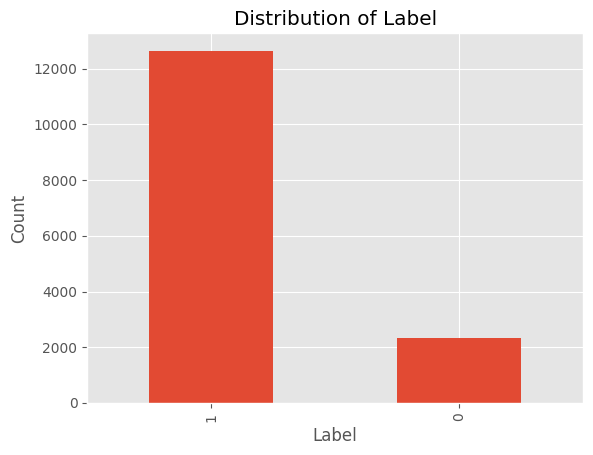

In [ ]:
# plot a bar chart to visualize the distribution of the 'label' field
score['label'].value_counts().plot(kind='bar')

# set the title and axis labels
plt.title('Distribution of Label')
plt.xlabel('Label')
plt.ylabel('Count')

# display the plot
plt.show()


In [ ]:
df_new = score.loc[:, ['rating','likes','compound','label']]

In [ ]:
X = df_new.iloc[:, :-1] # select all rows and all columns except the last one
y = df_new.iloc[:, -1]  # select all rows and only the last column

In [ ]:
from sklearn.model_selection import train_test_split
# split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=2, random_state=0)

clf.fit(X_train,y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [ ]:
from sklearn.metrics import classification_report, f1_score, accuracy_score
# make predictions on the test set
y_pred = clf.predict(X_test)

# generate a classification report
report = classification_report(y_test, y_pred)
print(report)
print("Accuracy: ",accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       710
           1       0.84      1.00      0.91      3788

    accuracy                           0.84      4498
   macro avg       0.42      0.50      0.46      4498
weighted avg       0.71      0.84      0.77      4498

Accuracy:  0.8421520675855936


In [ ]:
from sklearn import svm
sv = svm.SVC(kernel='linear')
sv.fit(X_train, y_train)
y_pred = sv.predict(X_test)

# generate a classification report
report = classification_report(y_test, y_pred)
print(report)
print("Accuracy: ",accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       710
           1       0.84      1.00      0.91      3788

    accuracy                           0.84      4498
   macro avg       0.42      0.50      0.46      4498
weighted avg       0.71      0.84      0.77      4498

Accuracy:  0.8421520675855936
